<a href="https://colab.research.google.com/github/nagaforjesus/python-projects/blob/main/FAFSA_testing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: Assessing FAFSA Completion Disparities
a. Data Processing

This section processes demographic and FAFSA completion data using pandas and visualizes the results with matplotlib. We focus on finding patterns in completion rates across different demographic groups.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load FAFSA completion and demographic data
df = pd.read_csv('fa_fsa_completion.csv')

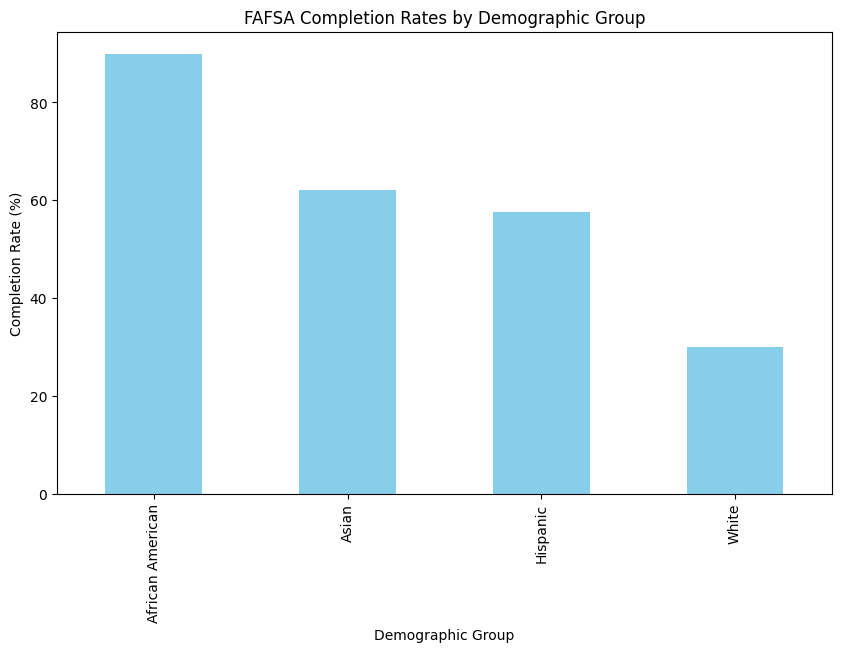

In [6]:
# Calculate average FAFSA completion rate by demographic group
completion_rates = df.groupby('demographic_group')['completion_rate'].mean()

# Visualize the completion rates
plt.figure(figsize=(10, 6))
completion_rates.plot(kind='bar', color='skyblue')
plt.title('FAFSA Completion Rates by Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Completion Rate (%)')
plt.show()

b. Identifying Areas with Low Completion Rates

This section identifies regions where FAFSA completion rates are low, highlighting underserved areas.

In [7]:
# Filter regions with completion rates below a defined threshold (e.g., 50%)
low_completion_areas = df[df['completion_rate'] < 50]

# Display regions with low completion rates
print(low_completion_areas[['region', 'completion_rate']])


  region  completion_rate
2   West               30
4  South               30


Phase 2: Predicting College Interest Using Machine Learning
We use machine learning to predict students' likelihood of attending college based on factors like GPA and family income.

a. Training a Model

This section trains a Random Forest model to predict college interest.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = df[['GPA', 'family_income', 'school_performance']]  # Features
y = df['college_interest']  # Target: 1 = interested, 0 = not interested

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 0.00%


b. Making Predictions

After training, the model can predict college interest for new students.

In [9]:
# Define new students' data
new_students = pd.DataFrame({
    'GPA': [3.0, 3.7],
    'family_income': [30000, 55000],
    'school_performance': [80, 90]
})

# Predict college interest for new students
predictions = model.predict(new_students)
print('Predicted College Interest:', predictions)


Predicted College Interest: [1 1]


Phase 3: Outreach and Awareness Automation
This phase involves automating outreach to students based on their FAFSA completion status or predicted college interest.

a. Identifying Knowledge Gaps in FAFSA Completion

You can analyze common reasons why students don't complete the FAFSA.

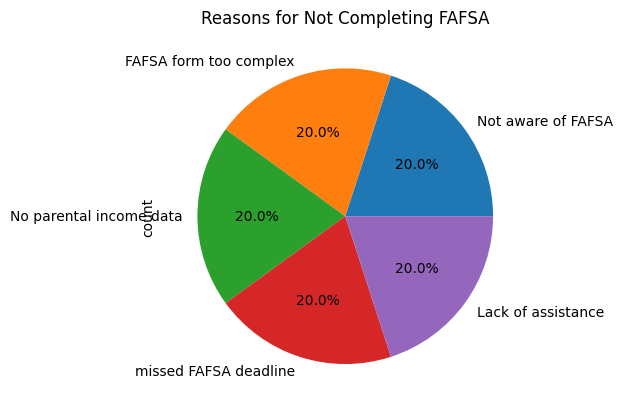

In [10]:
# Count and visualize reasons for not completing FAFSA
reason_counts = df['reason_not_completed'].value_counts()

# Plot the reasons as a pie chart
reason_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Reasons for Not Completing FAFSA')
plt.show()


Phase 4: Visualizing Financial Need and Prioritizing Students
You can visualize which students have the highest financial need and prioritize them for outreach or aid packages.

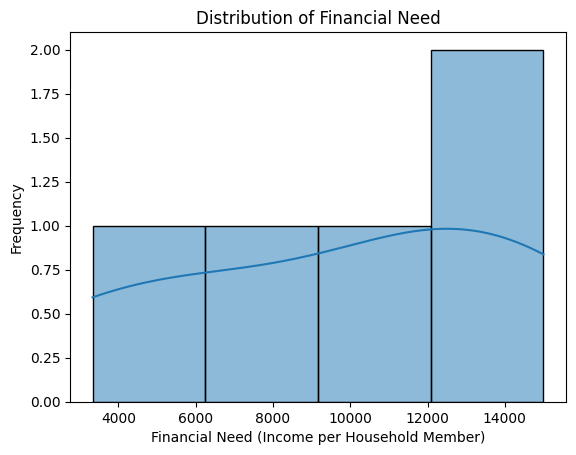

In [12]:
import seaborn as sns

# Calculate financial need based on family income and size
df['financial_need'] = df['family_income'] / df['family_size']

# Plot the distribution of financial need
sns.histplot(df['financial_need'], kde=True)
plt.title('Distribution of Financial Need')
plt.xlabel('Financial Need (Income per Household Member)')
plt.ylabel('Frequency')
plt.show()


Phase 5: Recommending Financial Aid Packages
This phase uses machine learning to recommend personalized financial aid packages.

In [14]:
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df[['family_income', 'GPA', 'financial_obligations']]
y = df['aid_package_type']  # 0: Loan, 1: Grant, 2: Work-study

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict aid package for a new student
new_student = [[45000, 85, 10000]]  # Example input: income, performance, obligations
predicted_package = model.predict(new_student)
print('Recommended Aid Package:', predicted_package)


Recommended Aid Package: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Packages used for my sample project

Summary of Python Tools:
1:Data Processing & Visualization: pandas, matplotlib, seaborn

2:Machine Learning: scikit-learn

3:outreach Automation: smtplib (for emails), tweepy (optional for social media outreach)

4:Modeling & Prediction: Logistic regression and Random Forest in scikit-learn
